In [2]:
import numpy as np
from sympy import symbols, sqrt

## Seguimiento del capitulo 1: Algebra Lineal del libro Computación Cuántica de Jean-Pierre Deschamps

La función zip en Python toma dos o más iterables (como listas, tuplas, etc.) y devuelve un nuevo iterable que contiene tuplas emparejadas de elementos correspondientes de los iterables originales. Cada tupla tiene elementos de las mismas posiciones en los iterables de entrada.

In [3]:
def producto_interno(vector1, vector2):
    if len(vector1) == len(vector2):
        resultado = sum(x * y for x, y in zip(vector1, vector2))
        return resultado
    else:
        raise ValueError("Los vectores deben tener la misma dimensión.")

Lo vectores propios son las columnas de la matriz que devuelve la funcion eig

In [4]:
def calcular_propios(matriz):
    # Calcular los valores y vectores propios
    valores_propios, vectores_propios = np.linalg.eig(matriz)
    
    # Devolver los resultados
    return valores_propios, vectores_propios

In [5]:
# Crear una matriz de Hadamard de orden 2
matriz_hadamard = np.array([[1/np.sqrt(2), 1/np.sqrt(2)],
                              [1/np.sqrt(2), -1/np.sqrt(2)]])

# Calcular valores y vectores propios
valores_propios, vectores_propios = calcular_propios(matriz_hadamard)

# Imprimir los resultados
print("Matriz de Hadamard de orden 2:")
print(matriz_hadamard)

print("\nValores propios:")
print(valores_propios)

# Iterar sobre cada columna e imprimir sus elementos
for i in range(vectores_propios.shape[1]):
    columna_actual = vectores_propios[:, i]
    print(f"\nVector propio {i + 1}: {columna_actual}")


print("\nProducto interno:")
print(producto_interno(vectores_propios[:,0], vectores_propios[:,1]))

print("\nMutliplicación de vectores propios por la matriz")
print(matriz_hadamard @ vectores_propios)


Matriz de Hadamard de orden 2:
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

Valores propios:
[ 1. -1.]

Vector propio 1: [0.92387953 0.38268343]

Vector propio 2: [-0.38268343  0.92387953]

Producto interno:
0.0

Mutliplicación de vectores propios por la matriz
[[ 0.92387953  0.38268343]
 [ 0.38268343 -0.92387953]]


Realizar un cambio de base a una matriz implica expresar la matriz en términos de los vectores de una nueva base. 

Si tienes una matriz $A$ y una matriz de cambio de base $P$ cuyas columnas son los vectores de la nueva base, el cambio de base se realiza mediante la multiplicación $P^{-1}AP$

In [6]:
# Calcular la inversa de P
P_inv = np.linalg.inv(vectores_propios)

# Realizar el cambio de base
Hadamard_en_nueva_base = np.round(np.dot(P_inv, np.dot(matriz_hadamard, vectores_propios)), decimals=2)

# Imprimir la matriz original y la matriz en la nueva base
print("Matriz original A:")
print(matriz_hadamard)

print("\nMatriz en la nueva base:")
print(Hadamard_en_nueva_base)


Matriz original A:
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

Matriz en la nueva base:
[[ 1.  0.]
 [ 0. -1.]]


In [16]:
print(matriz_hadamard @ matriz_hadamard)

[[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]


### Ejercicios


#### Ejercicio 1: Compruebe que los vectores $\begin{bmatrix}1\\2 \end{bmatrix}$ y $\begin{bmatrix}2\\1 \end{bmatrix}$ constituyen una base del espacio $V = \Complex^2$. Observese que no es normal ni ortogonal

Resolución:
* Para que dos vectores constituyan una base de $\Complex^2$ hay que comprobar si son linealmente independientes. Se comprueba facilmente creando una matrix 2 x 2 con los vectores como columnas y comprobando si el determinante de la mtriz es $\neq 0$

    $P = \begin{bmatrix} 1 & 2 \\ 2 & 1 \end{bmatrix}$

In [3]:
# Definir una matriz
matriz = np.array([[1, 2,],
                   [2,1]])

# Calcular el determinante
determinante = np.linalg.det(matriz)

print("Matriz:")
print(matriz)
print("\nDeterminante:", determinante)

Matriz:
[[1 2]
 [2 1]]

Determinante: -2.9999999999999996


$det(P) \neq 0$ entonces los vectores son linalmente independientes y constituyen una base de $\Complex^2$

Para coprobar que la base es normal, los vectores de la base tienen que tener norma 1.

In [4]:
# Definir un vector
vector1 = np.array([1, 2])
vector2 = np.array([2,1])

# Calcular la norma del vector
norma1 = np.linalg.norm(vector1)
norma2= np.linalg.norm(vector2)

print("Vector1:", vector1)
print("Norma1:", norma1)

print("Vector2:", vector2)
print("Norma2:", norma2)

Vector1: [1 2]
Norma1: 2.23606797749979
Vector2: [2 1]
Norma2: 2.23606797749979


Las normas son $\neq 1$ por lo que no es una base normal

Para que la base sea ortogonal, los vectores tienen que ser ortogonales entre si. Si el producto interno entre los dods vectores es 0 seran ortogonales.

In [6]:
producto_interno(vector1,vector2)

4

$\braket{v_1|v_2} \neq 0$ entonces no son vectores ortogonales, por lo qe no es una base ortogonal.

#### Ejercicio 2: Demuestre que, si un espacio vectorial tiene una base finita constituida por n elementos, todas las bases tienen este mismo numero n de elementos
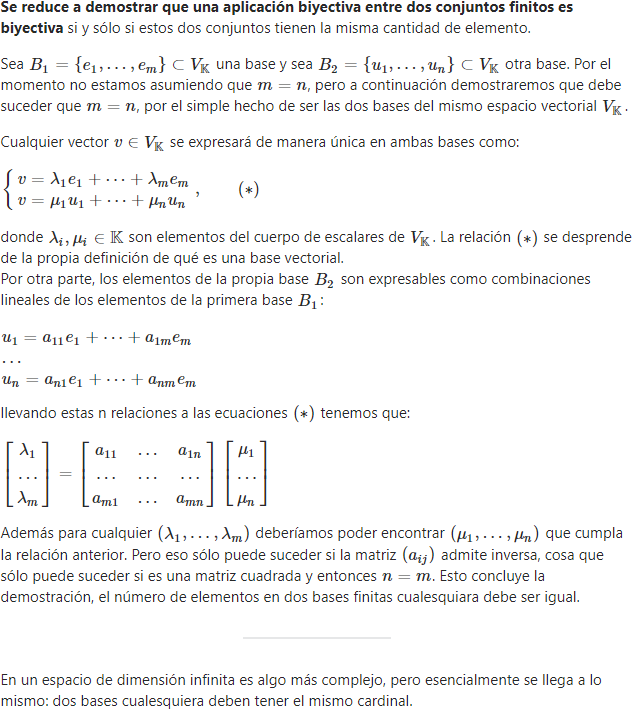

#### Ejercicio 3: Demuestre que en un espacio vectorial de dimensión n, todo conjunto de n vectores linealmente independientes es una base.

### Ejercicio 9:

In [8]:
ma = np.array([[1, 1], [1, 1]], dtype=float) 
valores, vectores = calcular_propios(ma)
outer_product = np.zeros_like(ma)
for i in range(len(vectores)):
    outer_product += valores[i]*np.outer(vectores[:,i], vectores[:,i])

#### Ejercicio 10:

In [28]:
import numpy as np

def calcular_vector_ortogonal(vector):
    # Generar un vector aleatorio para ser ortogonal a 'vector'
    vector_aleatorio = np.random.rand(len(vector))
    
    # Calcular el producto escalar entre 'vector' y 'vector_aleatorio'
    producto_escalar = np.dot(vector, vector_aleatorio)
    
    # Calcular el vector ortogonal restando la proyección de 'vector_aleatorio'
    # en la dirección de 'vector'
    vector_ortogonal = vector_aleatorio - producto_escalar * vector / np.linalg.norm(vector)**2
    
    return vector_ortogonal

# Ejemplo
vector_original = vectores[:,1]
vector_ortogonal = calcular_vector_ortogonal(vector_original)

print("Vector original:", vector_original)
print("Vector ortogonal:", vector_ortogonal)
print("Producto escalar:", np.dot(vector_original, vector_ortogonal))

P = [vector_original,vector_ortogonal]

# Calcular la inversa de P
P_inv = np.linalg.inv(P)

# Realizar el cambio de base
en_nueva_base = np.round(np.dot(P_inv, np.dot(ma, P)), decimals=0
                         )

# Imprimir la matriz original y la matriz en la nueva base
print("Matriz original A:")
print(ma)

print("\nMatriz en la nueva base:")
print(en_nueva_base)



Vector original: [-0.70710678  0.70710678]
Vector ortogonal: [0.5970151 0.5970151]
Producto escalar: -1.0577315304587929e-16
Matriz original A:
[[1. 1.]
 [1. 1.]]

Matriz en la nueva base:
[[-0.  0.]
 [-0.  2.]]
